# World cup predictions

## Introduction

This notebook contains the data analysis made to predict the **FIFA World Cup 2022** results based on **historical data** (International games), **fifa ranking** and **players stats** for each country participating in the world cup.

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## EDA

In [2]:
# Read the collected data about the World cup 2022
international_games = pd.read_csv('data/results.csv')
fifa_ranking = pd.read_csv('data/fifa_ranking-2022-10-06.csv')
players_stats = pd.read_csv('data/1-World_cup2022.csv')


In [3]:
def plot_missing_vals_percentage(data: pd.DataFrame, label:str) -> pd.DataFrame:
    """This function is used to plot the missing values percentage
    of a dataset.
    
    Args:
        data: The input dataset to view.
        label: The name of the dataset.
    """
    # Player stats missing values
    dataset_missing_values = pd.DataFrame(data.isnull().mean() * 100,columns=['missing_values_percentage']).sort_values('missing_values_percentage',ascending=False)
        
    ax = sns.barplot(data=dataset_missing_values,x=list(dataset_missing_values.index),y='missing_values_percentage')
    plt.title(f'Missing values percentage in {label} dataset')
    plt.xticks(rotation=90);
    plt.xlabel('Features');
    plt.ylabel('Missing values percentage')
    return dataset_missing_values
   

### The international games dataset

In [4]:
# View the international_games dataframe

international_games.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


In [5]:
international_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44152 entries, 0 to 44151
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        44152 non-null  object 
 1   home_team   44152 non-null  object 
 2   away_team   44152 non-null  object 
 3   home_score  44104 non-null  float64
 4   away_score  44104 non-null  float64
 5   tournament  44152 non-null  object 
 6   city        44152 non-null  object 
 7   country     44152 non-null  object 
 8   neutral     44152 non-null  bool   
dtypes: bool(1), float64(2), object(6)
memory usage: 2.7+ MB


In [6]:
# Parse the date column as a datetime object
international_games['date'] = pd.to_datetime(international_games['date'])
# Get the shape of international_games dataframe
international_games.shape


(44152, 9)

,missing_values_percentage
home_score,0.108715
away_score,0.108715
date,0.000000
home_team,0.000000
away_team,0.000000


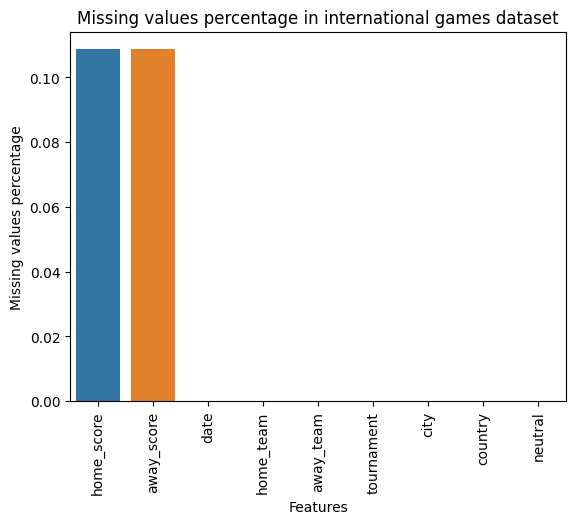

In [7]:
# Plot the missing values of the international games dataset
international_games_missing_vals = plot_missing_vals_percentage(international_games,'international games')
international_games_missing_vals.head()


Only **0.1%** of values are missing for **home_team** and **away_team** columns. 

In [8]:
# Select only the games before the world cup starts
pre_world_cup_games = international_games[international_games['date']< '2022-11-20']
pre_world_cup_games.head()


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


,missing_values_percentage
date,0.0
home_team,0.0
away_team,0.0
home_score,0.0
away_score,0.0


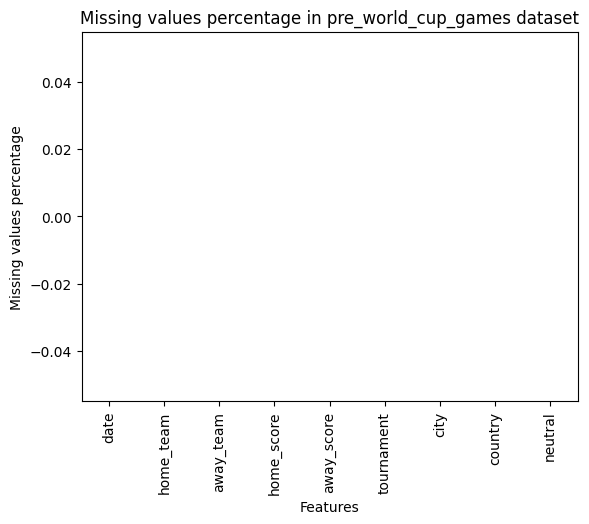

In [9]:
# Plot the missing values of the international games dataset
pre_world_cup_games_missing_vals = plot_missing_vals_percentage(pre_world_cup_games,'pre_world_cup_games')
pre_world_cup_games_missing_vals.head()


There are no missing values related to **pre world cup games**

In [10]:

# Select world cup games
world_cup_games = international_games[international_games['date']>'2022-11-19']
world_cup_games.head()


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
44104,2022-11-20,Qatar,Ecuador,NaN,NaN,FIFA World Cup,Al Khor,Qatar,False
44105,2022-11-21,Senegal,Netherlands,NaN,NaN,FIFA World Cup,Doha,Qatar,True
44106,2022-11-21,England,Iran,NaN,NaN,FIFA World Cup,Al Rayyan,Qatar,True
44107,2022-11-21,United States,Wales,NaN,NaN,FIFA World Cup,Al Rayyan,Qatar,True
44108,2022-11-22,Argentina,Saudi Arabia,NaN,NaN,FIFA World Cup,Lusail,Qatar,True


,missing_values_percentage
home_score,100.0
away_score,100.0
date,0.0
home_team,0.0
away_team,0.0


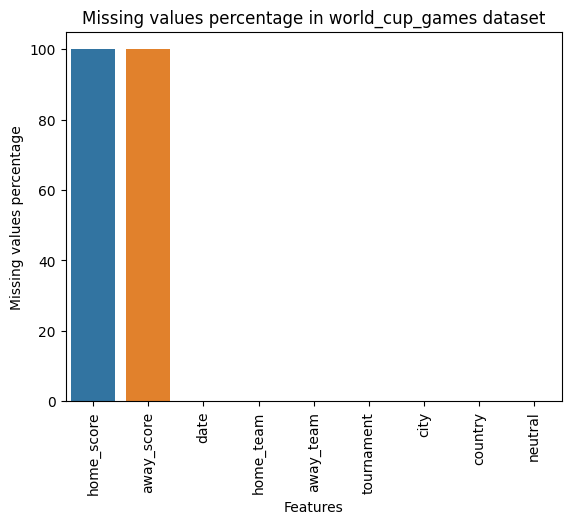

In [11]:
# Plot the missing values of the world_cup_games
world_cup_games_missing_vals = plot_missing_vals_percentage(world_cup_games,'world_cup_games')
world_cup_games_missing_vals.head()

The missing values in the **International football games** dataset are related to the upcoming world cup matches which haven't been played yet.

In [12]:
# World cup teams
wc_2022_teams = set(list(world_cup_games['home_team']) + list(world_cup_games['away_team']))

#### Historical data

In [13]:
# Select games for teams involved in the world cup 2022 that happened in the last 4 years and involve the participating teams in the world cup 2022
historical_data = pre_world_cup_games[((pre_world_cup_games.date.dt.year>=2018)   &  ((pre_world_cup_games['home_team'].isin(wc_2022_teams)) | (pre_world_cup_games['away_team'].isin(wc_2022_teams))))]
historical_data['date'] = pd.to_datetime(historical_data['date'])
historical_data

/home/amine/anaconda3/envs/udacity/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
39868,2018-01-11,Denmark,Sweden,0.0,1.0,Friendly,Abu Dhabi,United Arab Emirates,True
39871,2018-01-13,Morocco,Mauritania,4.0,0.0,African Nations Championship,Casablanca,Morocco,False
39879,2018-01-16,Cameroon,Congo,0.0,1.0,African Nations Championship,Agadir,Morocco,True
39880,2018-01-17,Morocco,Guinea,3.0,1.0,African Nations Championship,Casablanca,Morocco,False
39886,2018-01-20,Angola,Cameroon,1.0,0.0,African Nations Championship,Agadir,Morocco,True
...,...,...,...,...,...,...,...,...,...
44091,2022-11-16,Mexico,Sweden,1.0,2.0,Friendly,Girona,Spain,True
44095,2022-11-16,Oman,Germany,0.0,1.0,Friendly,Muscat,Oman,False
44097,2022-11-16,Poland,Chile,1.0,0.0,Friendly,Warsaw,Poland,False
44098,2022-11-16,Saudi Arabia,Croatia,0.0,1.0,Friendly,Riyadh,Saudi Arabia,False


In [14]:
# We are going to drop the city column since the World cup is going to be hosted in QATAR
historical_data = historical_data.drop(columns=['city'])
historical_data.head()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral
39868,2018-01-11,Denmark,Sweden,0.0,1.0,Friendly,United Arab Emirates,True
39871,2018-01-13,Morocco,Mauritania,4.0,0.0,African Nations Championship,Morocco,False
39879,2018-01-16,Cameroon,Congo,0.0,1.0,African Nations Championship,Morocco,True
39880,2018-01-17,Morocco,Guinea,3.0,1.0,African Nations Championship,Morocco,False
39886,2018-01-20,Angola,Cameroon,1.0,0.0,African Nations Championship,Morocco,True


In [15]:
# Show the existing countries in history data
for country in set(historical_data.country):
    print(country)

Panama
Romania
Russia
Brazil
Eswatini
South Korea
Finland
Myanmar
Czech Republic
Kuwait
Lebanon
Moldova
Botswana
Burundi
Paraguay
China PR
Kosovo
Kazakhstan
Uruguay
Latvia
Australia
Netherlands
Argentina
Zambia
Rwanda
Togo
Republic of Ireland
Slovenia
Guatemala
North Macedonia
Turkey
Austria
Montenegro
Mali
DR Congo
Andorra
Georgia
Equatorial Guinea
Norway
Switzerland
Cameroon
Senegal
Egypt
Mexico
Estonia
Bosnia and Herzegovina
United States
Israel
Malawi
Guinea
Ethiopia
Malta
Honduras
Greece
Azerbaijan
England
Bangladesh
Italy
Tunisia
Belarus
Portugal
Ivory Coast
Liberia
Palestine
Libya
Iraq
Congo
Mauritania
El Salvador
Saint Kitts and Nevis
Algeria
Japan
Jordan
Venezuela
Taiwan
Bulgaria
Cayman Islands
Albania
Luxembourg
Comoros
Haiti
Ecuador
Bermuda
Bahrain
Ukraine
Slovakia
Tajikistan
São Tomé and Príncipe
Hong Kong
San Marino
Belgium
North Korea
Peru
Singapore
Germany
Burkina Faso
Qatar
Dominican Republic
Serbia
Morocco
Iceland
Gibraltar
Tanzania
Wales
Armenia
Hungary
Oman
Colombia


In [16]:
#! pip install pycountry_convert

In [17]:
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

In [18]:
wrong_names = []

def get_continent(host_country):
    """This function allows us to get the continent of the host country."""
    try:
        cn_a2_code =  country_name_to_country_alpha2(host_country)
    except:
        wrong_names.append(host_country)
        print(set(wrong_names))
        cn_a2_code = 'Unknown' 
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown'

        if ((host_country == 'Kosovo') | (host_country == 'Serbia and Montenegro') | (host_country =='Czechoslovakia') | (host_country == 'Yugoslavia')):
            cn_continent = 'EU' 
        if ((host_country == 'DR Congo') |(host_country == 'Zaïre')):
            cn_continent = 'AF'
        if host_country == 'East Timor':
            cn_continent = 'AS'

        
    return (cn_continent)

In [19]:
# Get the continents of each country and show the wrong country names
historical_data['continent'] = historical_data['country'].apply(get_continent)

{'China PR'}
{'China PR', 'England'}
{'Scotland', 'China PR', 'England'}
{'Scotland', 'China PR', 'England'}
{'Scotland', 'China PR', 'Northern Ireland', 'England'}
{'Scotland', 'China PR', 'Northern Ireland', 'England'}
{'Scotland', 'China PR', 'Northern Ireland', 'England'}
{'Scotland', 'China PR', 'Northern Ireland', 'England'}
{'Scotland', 'China PR', 'Northern Ireland', 'England'}
{'Scotland', 'China PR', 'Northern Ireland', 'England'}
{'Northern Ireland', 'England', 'Republic of Ireland', 'China PR', 'Scotland'}
{'Northern Ireland', 'England', 'Republic of Ireland', 'China PR', 'Scotland'}
{'Northern Ireland', 'England', 'Republic of Ireland', 'China PR', 'Scotland'}
{'Wales', 'Northern Ireland', 'England', 'Republic of Ireland', 'China PR', 'Scotland'}
{'Wales', 'Northern Ireland', 'England', 'Republic of Ireland', 'China PR', 'Scotland'}
{'Wales', 'Northern Ireland', 'England', 'Republic of Ireland', 'China PR', 'Scotland'}
{'Wales', 'Northern Ireland', 'England', 'Republic of 

In [20]:
# Show unique continents
historical_data.continent.value_counts()

EU         596
AS         285
NA         200
AF         188
SA         117
Unknown     93
OC           9
Name: continent, dtype: int64

In [21]:
# Rename the wrong countries 
names = {'Scotland': 'United Kingdom', 'Republic of Ireland': 'United Kingdom', 'Wales': 'United Kingdom', 'Northern Ireland': 'United Kingdom', 'China PR':'China', 'England': 'United Kingdom' }
for old_name, new_name in names.items():
    historical_data.loc[historical_data['country'] == old_name,'country'] = new_name

In [22]:
# Correct the continents of each country and show the wrong country names
historical_data['continent'] = historical_data['country'].apply(get_continent)

{'DR Congo', 'Wales', 'Kosovo', 'Northern Ireland', 'England', 'Republic of Ireland', 'China PR', 'Scotland'}
{'DR Congo', 'Wales', 'Kosovo', 'Northern Ireland', 'England', 'Republic of Ireland', 'China PR', 'Scotland'}
{'DR Congo', 'Wales', 'Kosovo', 'Northern Ireland', 'England', 'Republic of Ireland', 'China PR', 'Scotland'}
{'DR Congo', 'Wales', 'Kosovo', 'Northern Ireland', 'England', 'Republic of Ireland', 'China PR', 'Scotland'}


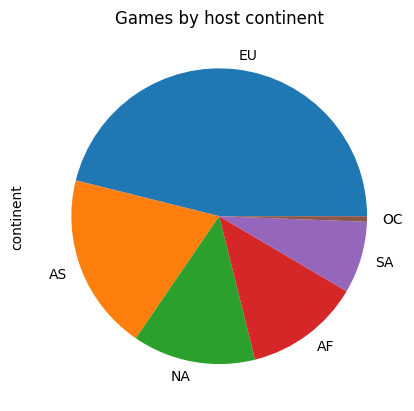

In [23]:
# Plot Games by host continent
historical_data.continent.value_counts().plot(kind='pie')
#plt.legend()
plt.title('Games by host continent');

Most of international football games were hosted by **European** countries. We can think of games played in **Oceania** as outliers since they're not numerous. 

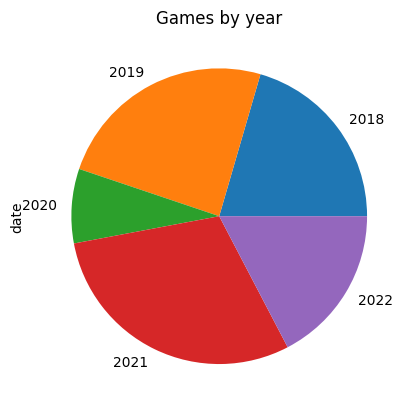

In [24]:
# Plot Games by year
historical_data.date.dt.year.value_counts().sort_index().plot(kind='pie')
plt.title('Games by year');

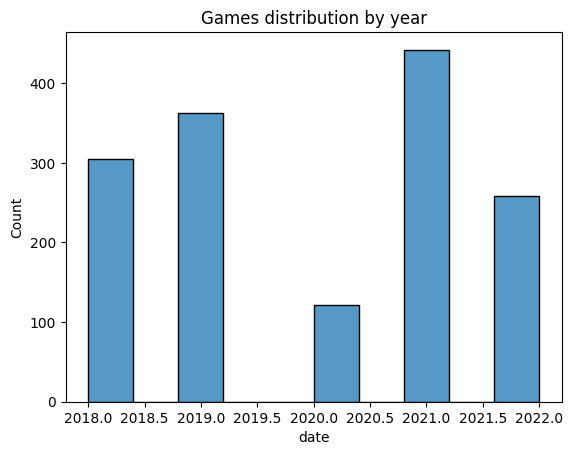

In [25]:
# Plot the games distribution by year
sns.histplot(historical_data['date'].dt.year,bins=10)
plt.title('Games distribution by year');

In [26]:
historical_data

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,continent
39868,2018-01-11,Denmark,Sweden,0.0,1.0,Friendly,United Arab Emirates,True,AS
39871,2018-01-13,Morocco,Mauritania,4.0,0.0,African Nations Championship,Morocco,False,AF
39879,2018-01-16,Cameroon,Congo,0.0,1.0,African Nations Championship,Morocco,True,AF
39880,2018-01-17,Morocco,Guinea,3.0,1.0,African Nations Championship,Morocco,False,AF
39886,2018-01-20,Angola,Cameroon,1.0,0.0,African Nations Championship,Morocco,True,AF
...,...,...,...,...,...,...,...,...,...
44091,2022-11-16,Mexico,Sweden,1.0,2.0,Friendly,Spain,True,EU
44095,2022-11-16,Oman,Germany,0.0,1.0,Friendly,Oman,False,AS
44097,2022-11-16,Poland,Chile,1.0,0.0,Friendly,Poland,False,EU
44098,2022-11-16,Saudi Arabia,Croatia,0.0,1.0,Friendly,Saudi Arabia,False,AS


### Fifa ranking dataset

In [27]:
# View Fifa ranking dataset
fifa_ranking.head()


,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,1,Germany,GER,57.0,0.0,0,UEFA,1992-12-31
1,96,Syria,SYR,11.0,0.0,0,AFC,1992-12-31
2,97,Burkina Faso,BFA,11.0,0.0,0,CAF,1992-12-31
3,99,Latvia,LVA,10.0,0.0,0,UEFA,1992-12-31
4,100,Burundi,BDI,10.0,0.0,0,CAF,1992-12-31


,missing_values_percentage
rank,0.0
country_full,0.0
country_abrv,0.0
total_points,0.0
previous_points,0.0
rank_change,0.0
confederation,0.0
rank_date,0.0


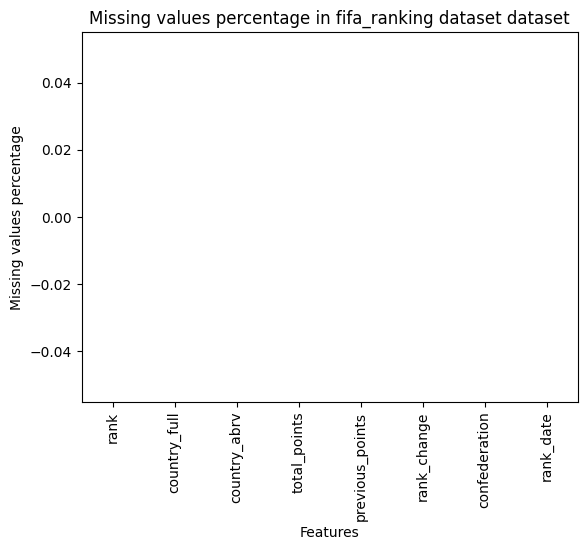

In [28]:
# Plot the missing vals percentage of fifa rankings
plot_missing_vals_percentage(fifa_ranking,'fifa_ranking dataset')

In [29]:
# Parse ranking date to datetime object
fifa_ranking['rank_date'] = pd.to_datetime(fifa_ranking['rank_date'])



In [30]:
def preprocess_ranking_dataset(data,ranking):
    """This function is used to preprocess fifa ranking dataset and remove games for
    non existing countries in FiFa rankings."""
    all_countries =  set(list(data['home_team']) + list(data['away_team']))
    non_existing_countries = all_countries.difference(set(ranking['country_full']))
    print(non_existing_countries)
    #Filter data for countries that don't exist in fifa ranking 
    data = data[~((data['home_team'].isin(non_existing_countries)) | (data['away_team'].isin(non_existing_countries)))]
    countries_dict = {'Cabo Verde':'Cape Verde','USA':'United States',"Côte d'Ivoire":"Ivory Coast",'Congo DR':'DR Congo','IR Iran':'Iran','US Virgin Islands':'United States Virgin Islands','Chinese Taipei':'Taiwan','Korea DPR':'North Korea','Korea Republic':'South Korea'}
    for k,v in countries_dict.items():
        ranking['country_full'] = ranking['country_full'].str.replace(k,v)
    non_existing_countries = all_countries.difference(set(ranking['country_full']))
    print(non_existing_countries)
    return data, ranking

In [31]:
# Preprocess the ranking dataset and historical_data
historical_data, fifa_ranking = preprocess_ranking_dataset(historical_data,fifa_ranking)


{'South Korea', 'Basque Country', 'Guadeloupe', 'North Korea', 'Iran', 'Taiwan', 'DR Congo', 'French Guiana', 'United States', 'Martinique', 'Ivory Coast', 'Saint Kitts and Nevis', 'Kyrgyzstan', 'Cape Verde', 'United States Virgin Islands'}
{'Guadeloupe', 'French Guiana', 'Martinique', 'Saint Kitts and Nevis', 'Kyrgyzstan', 'Basque Country'}


In [32]:
fifa_ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,1,Germany,GER,57.0,0.0,0,UEFA,1992-12-31
1,96,Syria,SYR,11.0,0.0,0,AFC,1992-12-31
2,97,Burkina Faso,BFA,11.0,0.0,0,CAF,1992-12-31
3,99,Latvia,LVA,10.0,0.0,0,UEFA,1992-12-31
4,100,Burundi,BDI,10.0,0.0,0,CAF,1992-12-31


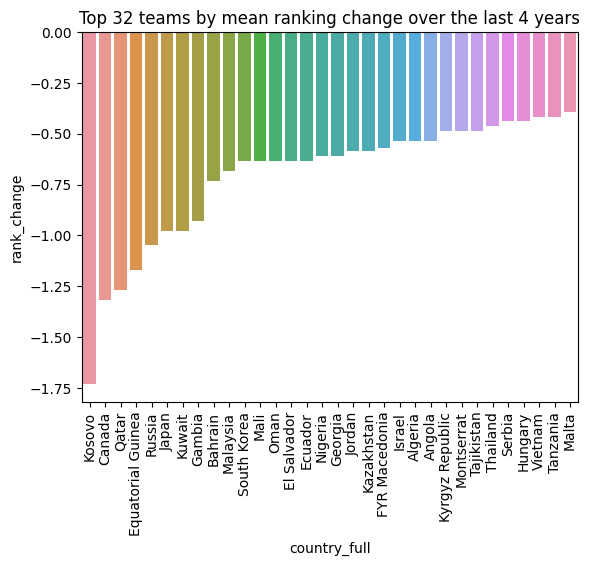

In [33]:
# Select fifa ranking historical data for countries
fifa_historical_ranking_2018 = fifa_ranking[fifa_ranking['rank_date'].dt.year >= 2018]
# Calculate the mean ranking for teams over the last years
fifa_historical_ranking_2018_mean = fifa_historical_ranking_2018.groupby('country_full').mean()
# Show countries by rank
sns.barplot(data=fifa_historical_ranking_2018_mean.sort_values('rank_change')[:32],x=fifa_historical_ranking_2018_mean.sort_values('rank_change').index[:32],y=fifa_historical_ranking_2018_mean.sort_values('rank_change')['rank_change'][:32])
plt.xticks(rotation='90');
plt.title('Top 32 teams by mean ranking change over the last 4 years');

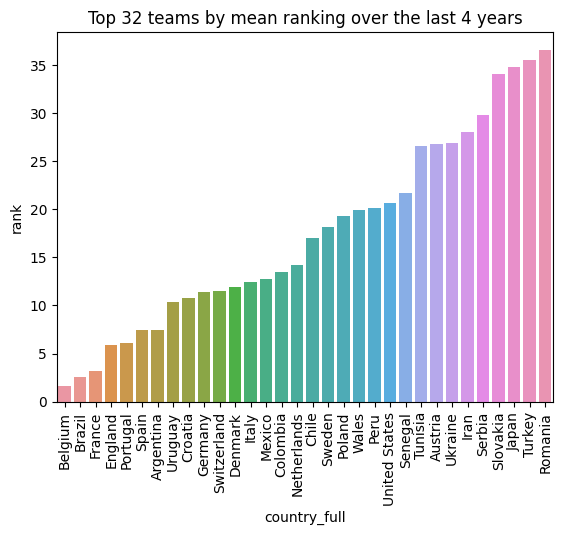

In [34]:

# Show countries by rank
sns.barplot(data=fifa_historical_ranking_2018_mean.sort_values('rank')[:32],x=fifa_historical_ranking_2018_mean.sort_values('rank').index[:32],y=fifa_historical_ranking_2018_mean.sort_values('rank')['rank'][:32])
plt.xticks(rotation='90');
plt.title('Top 32 teams by mean ranking over the last 4 years');

In [35]:
def calculate_score(data):
    '''This function is used to calculate the score between home and away teams.'''
    if data['home_score'] - data['away_score']>0:
        results = 'Home'
    elif data['home_score'] == data['away_score']:
        results = 'Draw'
    elif  data['home_score'] - data['away_score'] <0:
        results = 'Away'
    else:
        print('check the scores!')
    return results


In [38]:
def calculate_rank_difference(ranking,date,home_team,away_team):
    """This function is used to calculate the rank difference between
    home and away teams at a specific time."""
    year = date.year
    try:
        
        fifa_historical_ranking = ranking[ranking['rank_date'].dt.year == year].set_index('country_full')
       
        return (fifa_historical_ranking.loc[home_team]['rank'].mean() - fifa_historical_ranking.loc[away_team]['rank'].mean())

    except KeyError:
        pass
        return 'Unknown'





In [39]:
def calculate_head_to_head_score(data, home_team, away_team):
    '''This function is used to calculate the head_to_head_score between teams'''
    home_away = data.loc[((data['home_team'] == home_team) & (data['away_team'] == away_team))]
    
    if len(home_away) ==1:
        head_to_head_score = list(home_away['home_score'] - home_away['away_score'])[0]
    elif len(home_away) >1:
        head_to_head_score = home_away['home_score'].sum() - home_away['away_score'].sum()
    else:
        head_to_head_score = 0
        
    return head_to_head_score

#### Feature engineering 

In [40]:
# Calculate the final results for post_2018_data
historical_data['final_results'] = historical_data.apply(lambda x: calculate_score(x),axis=1)
# Calculate the head_to_head score for teams participating in the world cup
historical_data['head_to_head_score'] = historical_data[['home_team','away_team']].apply(lambda x: calculate_head_to_head_score(historical_data,x['home_team'],x['away_team']),axis=1)
# Calculate the rank difference for games that happened after 2018
historical_data['date'] = pd.to_datetime(historical_data['date'])
historical_data['rank_difference'] = historical_data.apply(lambda x: calculate_rank_difference(fifa_ranking,x['date'],x['home_team'],x['away_team']),axis=1)

/home/amine/anaconda3/envs/udacity/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/amine/anaconda3/envs/udacity/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/amine/anaconda3/envs/udacity/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [41]:
# Drop games that have no ranking records
unknown_rank = historical_data[historical_data['rank_difference']=='Unknown'].index
historical_data = historical_data.drop(unknown_rank)


In [42]:
# Parse rankings difference as float
historical_data.rank_difference = historical_data.rank_difference.astype(float)

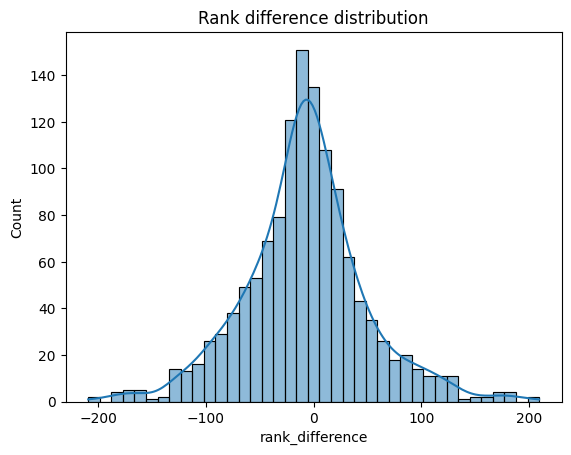

In [43]:
# Plot the rank difference distribution
sns.histplot(historical_data['rank_difference'],kde=True)
plt.title('Rank difference distribution');

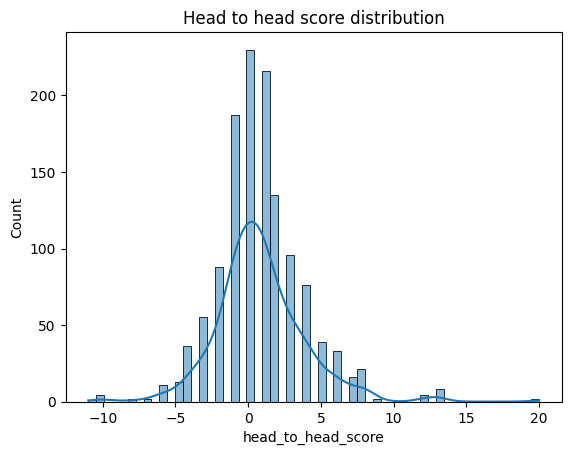

In [44]:
# Plot the Head to head score distribution
sns.histplot(historical_data['head_to_head_score'],kde=True)
plt.title('Head to head score distribution');

### World cup winners dataset

In [45]:
# View the world cup winners dataset
wc_winners = pd.read_csv('data/WorldCups.csv')
wc_winners.head()


,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


,missing_values_percentage
Year,0.0
Country,0.0
Winner,0.0
Runners-Up,0.0
Third,0.0
Fourth,0.0
GoalsScored,0.0
QualifiedTeams,0.0
MatchesPlayed,0.0
Attendance,0.0


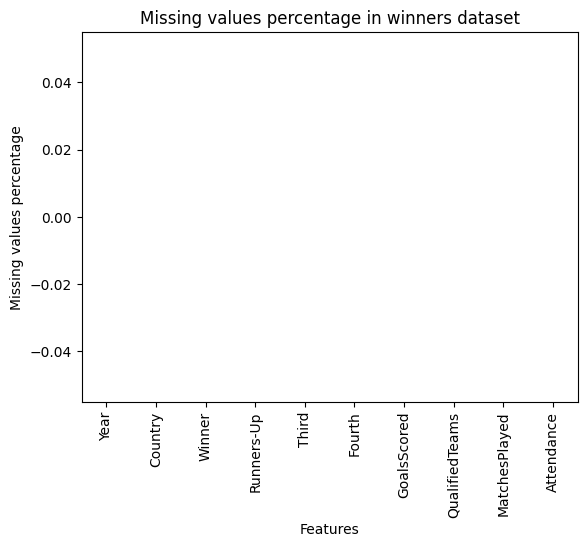

In [46]:
# Plot the missing values 
plot_missing_vals_percentage(wc_winners,'winners')

In [47]:
# Add data for 2018 world cup
wc_winners = wc_winners.append({'Year':2018,'Country':'Russia','Winner':'France','Runners-Up':'Croatia','Third':'Beligum','Fourth':'England','GoalsScored':169,'QualifiedTeams':32,'MatchesPlayed':64,'Attendance':3031768},ignore_index=True)
# Clean the name of some misspelled countries
wc_winners['Winner'] = wc_winners['Winner'].str.replace('Germany FR','Germany')
wc_winners['Runners-Up'] = wc_winners['Runners-Up'].str.replace('Germany FR','Germany')
wc_winners['Third'] = wc_winners['Third'].str.replace('Germany FR','Germany')
wc_winners['Fourth'] = wc_winners['Fourth'].str.replace('Germany FR','Germany')

Text(0.5, 1.0, 'The world cup winners')

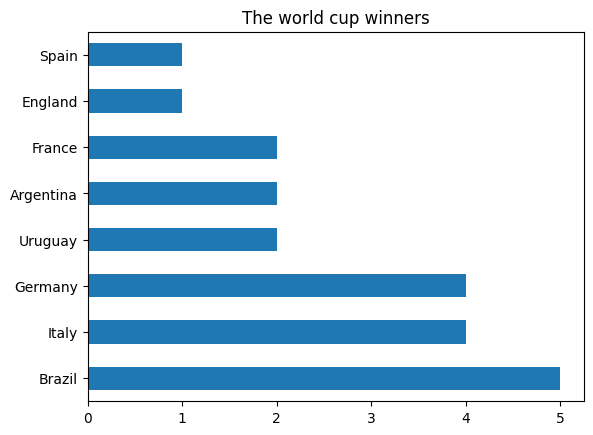

In [48]:
# Plot world cup winners

wc_winners.Winner.value_counts().plot(kind='barh')
plt.title('The world cup winners')

Text(0.5, 1.0, 'The world cup runners up')

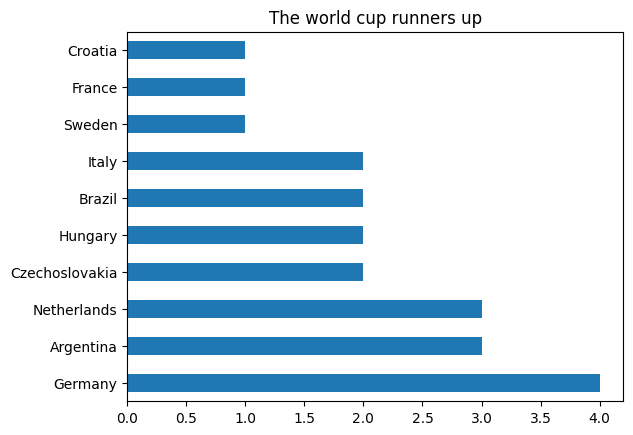

In [49]:
# Plot world cup runners-up
wc_winners['Runners-Up'].value_counts().plot(kind='barh')
plt.title('The world cup runners up')

Text(0.5, 1.0, 'The world cup teams that came third')

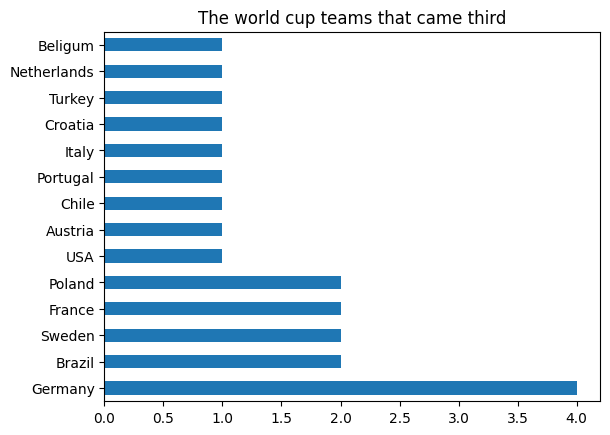

In [50]:
# Plot the world cup third place 
wc_winners['Third'].value_counts().plot(kind='barh')
plt.title('The world cup teams that came third')


Text(0.5, 1.0, 'Teams that came fourth in world cups')

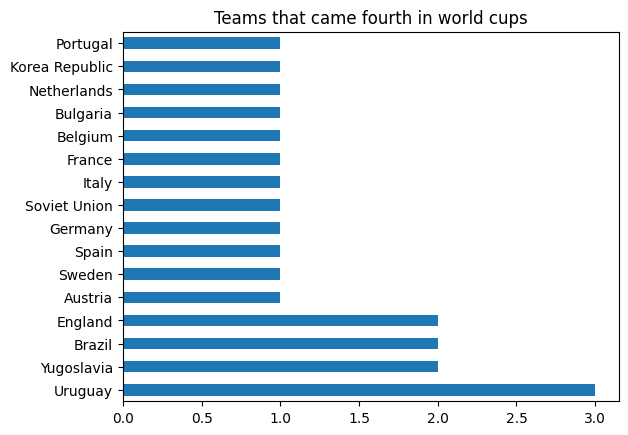

In [51]:
# Plot the world cup fourth place teams
wc_winners['Fourth'].value_counts().plot(kind='barh')
plt.title('Teams that came fourth in world cups')

In [52]:
# Save countries achievements
world_cup_winners = dict(wc_winners['Winner'].value_counts())
second_place = dict(wc_winners['Runners-Up'].value_counts())
third_place = dict(wc_winners['Third'].value_counts())
fourth_place = dict(wc_winners['Fourth'].value_counts())

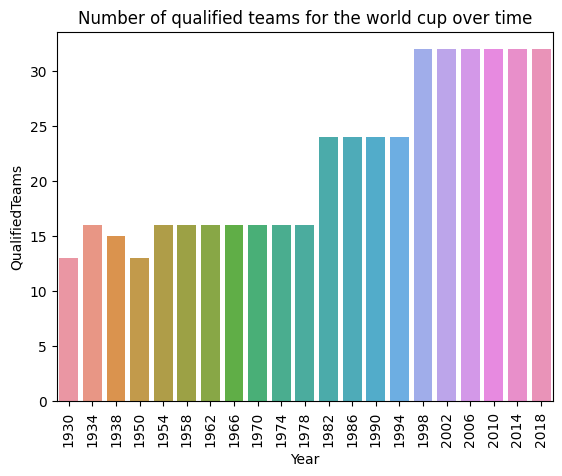

In [54]:
# Plot the number of qualified teams for the world cup over time
sns.barplot(wc_winners,x='Year',y='QualifiedTeams')
plt.xticks(rotation=90);
plt.title('Number of qualified teams for the world cup over time');

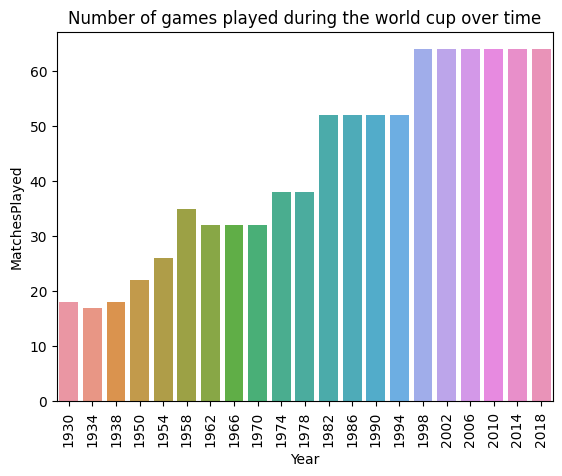

In [57]:
# Plot the number of played games during the world cup over time

sns.barplot(wc_winners,x='Year',y='MatchesPlayed')
plt.xticks(rotation=90);
plt.title('Number of games played during the world cup over time');

In [56]:
# Old Nations
yugoslavia = ['Bosnia and Herzegovina', 'Croatia', 'Macedonia', 'Montenegro', 'Serbia','Kosovo','Slovenia']
czechoslovakia = ['Czech','Slovakia']
soviet_union = ['Armenia', 'Azerbaijan', 'Belarus', 'Estonia', 'Georgia', 'Kazakhstan', 'Kyrgyzstan', 'Latvia', 'Lithuania', 'Moldova', 'Russia', 'Tajikistan', 'Turkmenistan', 'Ukraine',  'Uzbekistan']
# Fix the achievements of old nations participating in this world cup version

old_nations_in_wc = set(yugoslavia + soviet_union + czechoslovakia).intersection(wc_2022_teams)
old_nations_in_wc

{'Croatia', 'Serbia'}

In [58]:
def add_achievements(data,home_team, away_team):
    """This function is used to add historical achievements for each team."""
   
    world_cup_records = [world_cup_winners, second_place, third_place, fourth_place]
    titles = ['winner','second_place','third_place','fourth_place']
    for record, title in zip(world_cup_records,titles):
        

        if home_team in record:
            
            data.loc[data['home_team'] == home_team,f'home_team_{title}'] = record[home_team]
        

            

        else:
            data.loc[data['home_team'] == home_team,f'home_team_{title}'] = 0
        if away_team in record:
           
            data.loc[data['away_team'] == away_team,f'away_team_{title}'] = record[away_team]
            
        else:
            data.loc[data['away_team'] == away_team,f'away_team_{title}'] = 0


In [59]:
   # Add country achievements
   historical_data.apply(lambda x: add_achievements(historical_data,x['home_team'],x['away_team']),axis=1) 

39868    None
39871    None
39879    None
39880    None
39886    None
         ... 
44091    None
44095    None
44097    None
44098    None
44100    None
Length: 1277, dtype: object

In [60]:
# Check Brazil's achievements 5 world cups, 2 times second place, 2 third and 2 fourth place
historical_data[historical_data['home_team'] == 'Brazil'].head()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,continent,final_results,head_to_head_score,rank_difference,home_team_winner,away_team_winner,home_team_second_place,away_team_second_place,home_team_third_place,away_team_third_place,home_team_fourth_place,away_team_fourth_place
40243,2018-06-17,Brazil,Switzerland,1.0,1.0,FIFA World Cup,Russia,True,EU,Draw,0.0,-4.916667,5.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0
40256,2018-06-22,Brazil,Costa Rica,2.0,0.0,FIFA World Cup,Russia,True,EU,Home,2.0,-27.916667,5.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0
40285,2018-07-02,Brazil,Mexico,2.0,0.0,FIFA World Cup,Russia,True,EU,Home,2.0,-13.000000,5.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0
40291,2018-07-06,Brazil,Belgium,1.0,2.0,FIFA World Cup,Russia,True,EU,Away,-1.0,-0.333333,5.0,0.0,2.0,0.0,2.0,0.0,2.0,1.0
40449,2018-09-12,Brazil,El Salvador,5.0,0.0,Friendly,United States,True,NA,Home,5.0,-75.750000,5.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0


In [61]:
# SHOW SOME DESCRIPTIVE STATISTICS ABOUT THE FINAL DATASET
historical_data.describe()

,home_score,away_score,head_to_head_score,rank_difference,home_team_winner,away_team_winner,home_team_second_place,away_team_second_place,home_team_third_place,away_team_third_place,home_team_fourth_place,away_team_fourth_place
count,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.00000,1277.000000,1277.000000
mean,1.608457,1.077525,0.843383,-8.143862,0.498042,0.326547,0.415818,0.285043,0.385278,0.28426,0.346124,0.271731
std,1.625673,1.251746,3.090419,56.658614,1.207748,0.957903,0.981091,0.822034,0.857588,0.72344,0.670127,0.618871
min,0.000000,0.000000,-11.000000,-209.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,-1.000000,-38.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,-7.916667,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,2.000000,2.000000,2.000000,19.625000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
max,14.000000,11.000000,20.000000,209.125000,5.000000,5.000000,4.000000,4.000000,4.000000,4.00000,3.000000,3.000000


### Checking the skewness (skip this part while running)

In [62]:
from scipy.stats import skew


In [ ]:
def check_and_reduce_skewness(data):
    """This function is used to check and reduce skewness."""
    skewed_features = data.select_dtypes(include=['float64',bool]).apply(lambda x: skew(x)).sort_values(ascending=False)
    high_skew = skewed_features[abs(skewed_features) > 0.5]
    high_skew_df = pd.DataFrame(high_skew,columns=['skew'])
    new = data.copy()
    #Transforming skewed columns
    for feature in high_skew.index:
        new[feature] = np.sqrt(new[feature])
        
    return new

### Dealing with outliers

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'home_score'),
  Text(1, 0, 'away_score'),
  Text(2, 0, 'neutral'),
  Text(3, 0, 'head_to_head_score'),
  Text(4, 0, 'rank_difference'),
  Text(5, 0, 'home_team_winner'),
  Text(6, 0, 'away_team_winner'),
  Text(7, 0, 'home_team_second_place'),
  Text(8, 0, 'away_team_second_place'),
  Text(9, 0, 'home_team_third_place'),
  Text(10, 0, 'away_team_third_place'),
  Text(11, 0, 'home_team_fourth_place'),
  Text(12, 0, 'away_team_fourth_place')])

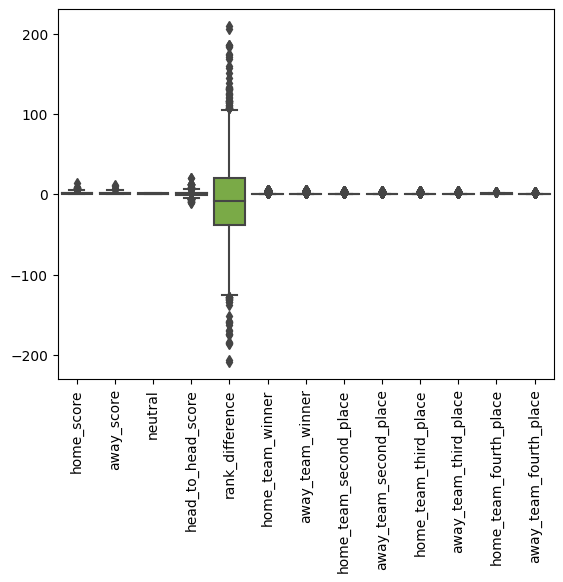

In [63]:
# PLot the boxplot of the numeric features
sns.boxplot(historical_data)
plt.xticks(rotation=90)

In [64]:
# Find outliers using the Inter-quartile method
q1 = historical_data.rank_difference.quantile(0.25)
q3 = historical_data.rank_difference.quantile(0.75)
interquantile_range = q3-q1
outliers = historical_data[((historical_data.rank_difference<(q1-1.5*interquantile_range)) | (historical_data.rank_difference>(q3+1.5*interquantile_range)))]

In [65]:
outliers.shape

(75, 20)

In [66]:
# Drop the outliers
historical_data = historical_data.drop(outliers.index)


In [67]:
historical_data.shape

(1202, 20)

# Modeling

In [68]:
# Select the features to use
data = historical_data[['tournament','rank_difference','head_to_head_score','final_results',
                        'home_team_winner','home_team_second_place','home_team_third_place','home_team_fourth_place',
                        'away_team_winner','away_team_second_place','away_team_third_place','away_team_fourth_place']].copy()
data.head()

,tournament,rank_difference,head_to_head_score,final_results,home_team_winner,home_team_second_place,home_team_third_place,home_team_fourth_place,away_team_winner,away_team_second_place,away_team_third_place,away_team_fourth_place
39868,Friendly,-7.000000,1.0,Away,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0
39871,African Nations Championship,-61.333333,4.0,Home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39879,African Nations Championship,-36.833333,-1.0,Away,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39880,African Nations Championship,-25.500000,8.0,Home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39886,African Nations Championship,85.500000,1.0,Home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
data.shape

(1202, 12)

## Who has the most wins? 


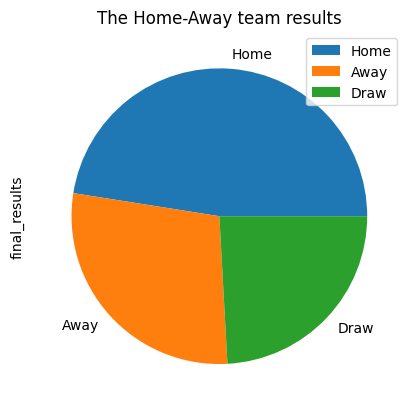

In [70]:
data['final_results'].value_counts().plot(kind='pie')
plt.legend()
plt.title('The Home-Away team results');

The **home** teams are the most winners.

In [71]:
# Show the number of games per class
data['final_results'].value_counts()

Home    571
Away    341
Draw    290
Name: final_results, dtype: int64

The data classes are not **balanced** so this can affect the behaviour of our classifier.

In [72]:
from sklearn.model_selection import  train_test_split
from sklearn import  preprocessing

In [73]:
def label_to_int(label):
    """This function converts labels to numeric."""
    label_dict = {'Away':2,'Home':0,'Draw':1}
    return label_dict[label] 

In [74]:
def split_data(data):
    """This function is used to split data."""
    # Split data to features and target
    X = data[data.columns.drop('final_results')]
    y = data['final_results']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    
    
    return X_train, X_test, y_train, y_test

In [75]:

def preprocess_training_data(data):
    """This function preprocesses the training data."""
    # Generate some features out of the date column
    """data['day'] = data['date'].dt.day
    data['month'] = data['date'].dt.month
    data['year'] = data['date'].dt.year
    data['dayoftheweek'] = data['date'].dt.dayofweek
    data.drop(columns=['date'],inplace=True)"""
    #data['neutral'] = data['neutral'].astype(int)
    # Convert Home, Draw, Away label results to int
    data['final_results'] = data['final_results'].apply(label_to_int)
    # Convert categorical features to numerical 
    data = pd.get_dummies(data)
    # Drop duplicates
    data = data.drop_duplicates()

    # Split  data
    X_train, X_test, y_train, y_test = split_data(data)
    
    
    return X_train, X_test, y_train, y_test

In [76]:
# Initialize scaler
scaler = preprocessing.StandardScaler()

## Imbalanced data 

In [77]:

# Preprocess the training data
X_train, X_test, y_train, y_test = preprocess_training_data(data)
print(X_train.shape)

# Apply standardization on training and test split
X_train_std = scaler.fit_transform(X_train, y_train)
X_test_std = scaler.transform(X_test)

(894, 33)


In [78]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix, confusion_matrix
import xgboost as xgb


In [79]:
def training_pipeline(train_features, train_labels):
    """This function defines the training pipeline launching Random Forest
    and XGBoost classifiers training and returns the estimators."""
    
    # Instantiate the random forest classifier and do the training 
    random_forest_clf = RandomForestClassifier(random_state=42)
    # Fit the training data to the labels
    random_forest_clf.fit(train_features, train_labels)
    
    
    
    # Instatiate the classification model
    xgb_model = xgb.XGBClassifier(objective='multi:softmax',random_state=42)
    #  Fit the training data to the labels
    xgb_model.fit(train_features,train_labels)
 
    
    return random_forest_clf, xgb_model

In [80]:
# Launch training 
rf_model, xgb_model = training_pipeline(X_train_std, y_train)

In [81]:
def evaluation_pipeline(rf_model, xgb_model, test_features, test_labels):
    """This function defines the evaluation pipeline launching Random Forest
    and XGBoost classifiers evaluation and shows their performance."""
    # Make predictions on the test data
    rf_pred=rf_model.predict(test_features)
    # Make predictions on test data
    xgb_pred = xgb_model.predict(test_features)
    # Evaluate the Random Forest model
    print("----classification report Random Forest classifier-----\n\n", classification_report(y_pred=rf_pred,y_true=test_labels))
    print("\n----classification report XGBoost classifier-----\n",classification_report(y_pred=xgb_pred,y_true=test_labels) )      
    print("\n----confusion matrix Random Forest classifier &  XGBoost classifier-----")
    plot_confusion_matrix(rf_model,test_features,test_labels);

    plot_confusion_matrix(xgb_model,test_features,test_labels);
    
    return rf_pred, xgb_pred
    
    
    
  
    
    

----classification report Random Forest classifier-----

               precision    recall  f1-score   support

           0       0.83      0.93      0.88       134
           1       0.79      0.70      0.74        77
           2       0.87      0.79      0.83        87

    accuracy                           0.83       298
   macro avg       0.83      0.81      0.82       298
weighted avg       0.83      0.83      0.83       298


----classification report XGBoost classifier-----
               precision    recall  f1-score   support

           0       0.84      0.90      0.87       134
           1       0.72      0.69      0.70        77
           2       0.88      0.82      0.85        87

    accuracy                           0.82       298
   macro avg       0.81      0.80      0.80       298
weighted avg       0.82      0.82      0.82       298


----confusion matrix Random Forest classifier &  XGBoost classifier-----


/home/amine/anaconda3/envs/udacity/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/home/amine/anaconda3/envs/udacity/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


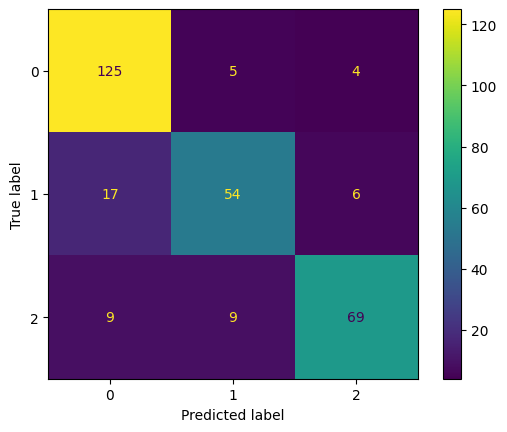

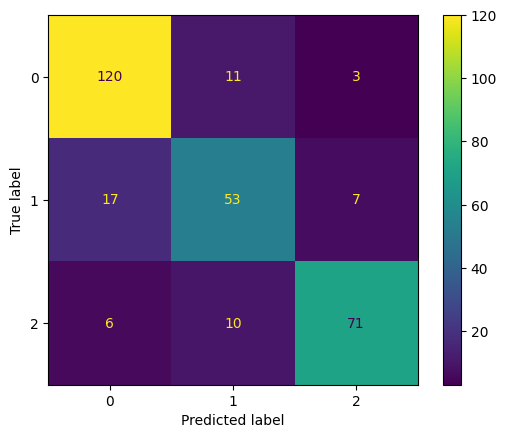

In [82]:
# Lanuch the evaluation pipeline
rf_pred, xgb_pred = evaluation_pipeline(rf_model, xgb_model, X_test_std, y_test)

# Refinement

### Data balancing

In [83]:
# Select the features to use
balanced_data =  historical_data[['tournament','rank_difference','head_to_head_score','final_results',
                        'home_team_winner','home_team_second_place','home_team_third_place','home_team_fourth_place',
                        'away_team_winner','away_team_second_place','away_team_third_place','away_team_fourth_place']].copy()
balanced_data.head()

,tournament,rank_difference,head_to_head_score,final_results,home_team_winner,home_team_second_place,home_team_third_place,home_team_fourth_place,away_team_winner,away_team_second_place,away_team_third_place,away_team_fourth_place
39868,Friendly,-7.000000,1.0,Away,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0
39871,African Nations Championship,-61.333333,4.0,Home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39879,African Nations Championship,-36.833333,-1.0,Away,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39880,African Nations Championship,-25.500000,8.0,Home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39886,African Nations Championship,85.500000,1.0,Home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


class 0 shape: (571, 12)
class 1 shape: (290, 12)
class 2 shape: (341, 12)


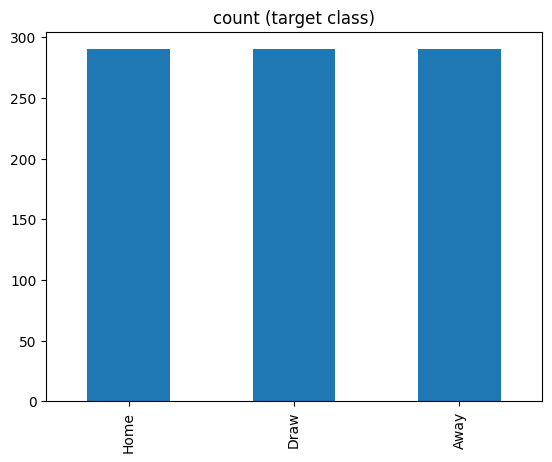

In [84]:
# Divide data by classes
class_count_0, class_count_1, class_count_2 = balanced_data['final_results'].value_counts()

# Separate class
class_0 = balanced_data[balanced_data['final_results'] == 'Home']
class_1 = balanced_data[balanced_data['final_results'] == 'Draw']# print the shape of the class
class_2 = balanced_data[balanced_data['final_results'] == 'Away']# print the shape of the class

print('class 0 shape:', class_0.shape)
print('class 1 shape:', class_1.shape)
print('class 2 shape:', class_2.shape)
class_0_under = class_0.sample(min(class_count_0,class_count_1,class_count_2),random_state=42)
class_2_under = class_2.sample(min(class_count_0,class_count_1,class_count_2),random_state=42)
balanced_data = pd.concat([class_0_under, class_1,class_2_under], axis=0)

balanced_data['final_results'].value_counts().plot(kind='bar', title='count (target class)');

In [85]:
# Preprocess the training data for the balanced data
X_train_bal, X_test_bal, y_train_bal, y_test_bal = preprocess_training_data(balanced_data)
print(X_train_bal.shape)
# Apply standardization on training and test split
X_train_std_bal = scaler.fit_transform(X_train_bal, y_train_bal)
X_test_std_bal = scaler.transform(X_test_bal)

(648, 33)


In [86]:
# Launch training pipeline for the balanced data
rf_model_bal, xgb_model_bal = training_pipeline(X_train_std_bal, y_train_bal)

/home/amine/anaconda3/envs/udacity/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/home/amine/anaconda3/envs/udacity/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/home/amine/anaconda3/envs/udacity/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/home/amine/anaconda3/envs/udacity/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: Fu

----classification report Random Forest classifier-----

               precision    recall  f1-score   support

           0       0.77      0.88      0.82        64
           1       0.86      0.71      0.77        78
           2       0.82      0.88      0.85        74

    accuracy                           0.81       216
   macro avg       0.82      0.82      0.81       216
weighted avg       0.82      0.81      0.81       216


----classification report XGBoost classifier-----
               precision    recall  f1-score   support

           0       0.81      0.91      0.85        64
           1       0.94      0.74      0.83        78
           2       0.84      0.93      0.88        74

    accuracy                           0.86       216
   macro avg       0.86      0.86      0.86       216
weighted avg       0.86      0.86      0.85       216


----confusion matrix Random Forest classifier &  XGBoost classifier-----


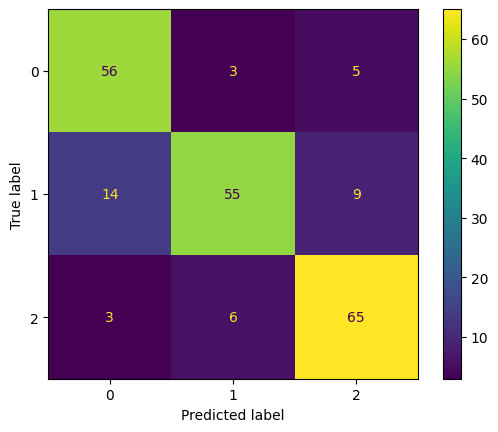

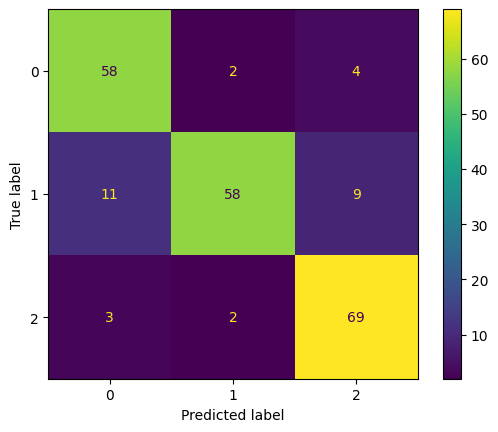

In [87]:
# Lanuch the evaluation pipeline for the balanced data
rf_pred_bal, xgb_pred_bal = evaluation_pipeline(rf_model_bal, xgb_model_bal, X_test_bal, y_test_bal)

### Fine-tuning and cross-validation

In [88]:
def training_pipeline_cv(train_features, train_labels):
    """This function defines the training pipeline launching Random Forest
    and XGBoost classifiers training with GridSearchCV and returns the best estimators."""
    
    # Instantiate the random forest classifier and do the training 
    random_forest_clf = RandomForestClassifier(random_state=42)
 
    # Set the parameters to fine-tune using GridSearchCV
    param_grid_rf = { 
        'n_estimators': [200,300, 500],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth' : [3,5,7,10],
    }
    # Fine-tune the model to the data and find the best parameters
    random_forest_clf_cv = GridSearchCV(estimator=random_forest_clf, param_grid=param_grid_rf, cv= 5,refit=True,return_train_score=True)
    # Fit the training data to the labels
    random_forest_clf_cv.fit(train_features, train_labels)

    print('random_forest_clf_cv best params',random_forest_clf_cv.best_params_)
    
    # Instatiate the xgboost classifier model
    xgb_model = xgb.XGBClassifier(objective='multi:softmax',random_state=42)
    param_grid_xgb = {
                    "max_depth": [3,5, 7],
                    "n_estimators": [100, 200,300],
                    "learning_rate": [0.1, 0.01,0.005],
                }
    xgb_model_cv = GridSearchCV(
            xgb_model,
            param_grid=param_grid_xgb,
            verbose=1,
            cv=5,
            refit=True,
            return_train_score=True,
        )
    #  Fit the training data to the labels
    xgb_model_cv.fit(train_features,train_labels)
    print('xgb_model_cv best params',xgb_model_cv.best_params_)

    
  
 
    
    return random_forest_clf_cv.best_estimator_, xgb_model_cv.best_estimator_

#### Imbalanced data

In [89]:
# Launch Fine-tuning using cross-validation on imbalanced data
random_forest_clf_cv, xgb_model_cv =  training_pipeline_cv(X_train_std,y_train)

random_forest_clf_cv best params {'max_depth': 7, 'max_features': 'auto', 'n_estimators': 300}
Fitting 5 folds for each of 27 candidates, totalling 135 fits
xgb_model_cv best params {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}


----classification report Random Forest classifier-----

               precision    recall  f1-score   support

           0       0.85      0.95      0.90       134
           1       0.83      0.70      0.76        77
           2       0.90      0.87      0.89        87

    accuracy                           0.86       298
   macro avg       0.86      0.84      0.85       298
weighted avg       0.86      0.86      0.86       298


----classification report XGBoost classifier-----
               precision    recall  f1-score   support

           0       0.85      0.96      0.91       134
           1       0.89      0.70      0.78        77
           2       0.91      0.90      0.90        87

    accuracy                           0.88       298
   macro avg       0.88      0.85      0.86       298
weighted avg       0.88      0.88      0.87       298


----confusion matrix Random Forest classifier &  XGBoost classifier-----


/home/amine/anaconda3/envs/udacity/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/home/amine/anaconda3/envs/udacity/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


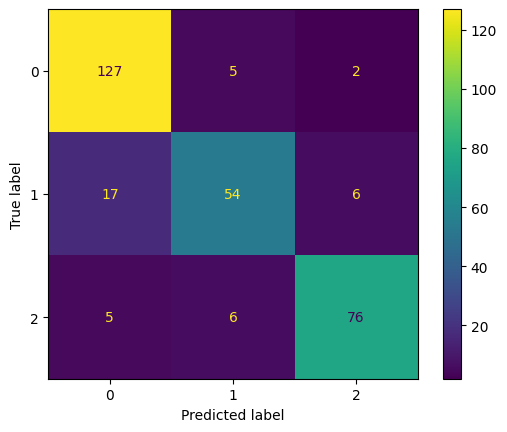

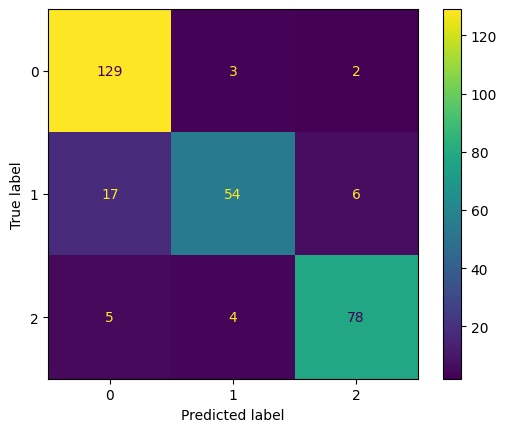

In [90]:
# Evaluate the fine-tuned models on the balanced data
rf_pred_cv, xgb_pred_cv = evaluation_pipeline(random_forest_clf_cv,xgb_model_cv,X_test_std,y_test)

#### Balanced data

In [91]:
# Launch Fine-tuning using cross-validation on balanced data
random_forest_clf_bal_cv, xgb_model_bal_cv =  training_pipeline_cv(X_train_bal,y_train_bal)

random_forest_clf_cv best params {'max_depth': 5, 'max_features': 'auto', 'n_estimators': 200}
Fitting 5 folds for each of 27 candidates, totalling 135 fits
xgb_model_cv best params {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}


----classification report Random Forest classifier-----

               precision    recall  f1-score   support

           0       0.90      0.55      0.68        64
           1       0.65      0.85      0.74        78
           2       0.87      0.89      0.88        74

    accuracy                           0.77       216
   macro avg       0.81      0.76      0.77       216
weighted avg       0.80      0.77      0.77       216


----classification report XGBoost classifier-----
               precision    recall  f1-score   support

           0       0.88      0.59      0.71        64
           1       0.68      0.85      0.75        78
           2       0.87      0.89      0.88        74

    accuracy                           0.79       216
   macro avg       0.81      0.78      0.78       216
weighted avg       0.81      0.79      0.78       216


----confusion matrix Random Forest classifier &  XGBoost classifier-----


/home/amine/anaconda3/envs/udacity/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/home/amine/anaconda3/envs/udacity/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/home/amine/anaconda3/envs/udacity/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/home/amine/anaconda3/envs/udacity/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusi

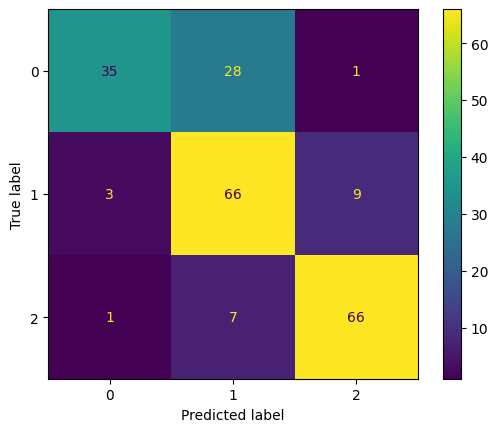

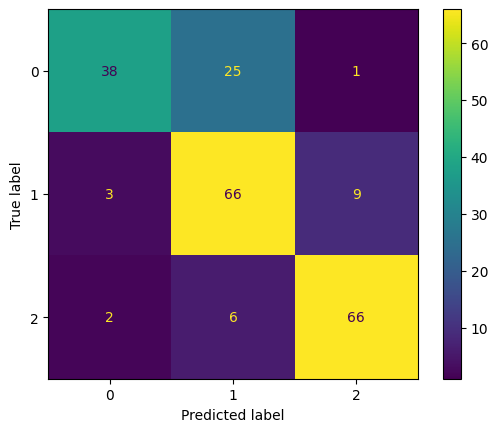

In [92]:
# Evaluate the fine-tuned models on the balanced data
rf_pred_bal_cv, xgb_pred_bal_cv = evaluation_pipeline(random_forest_clf_bal_cv,xgb_model_bal_cv,X_test_std_bal,y_test_bal)

#### PLot the best model

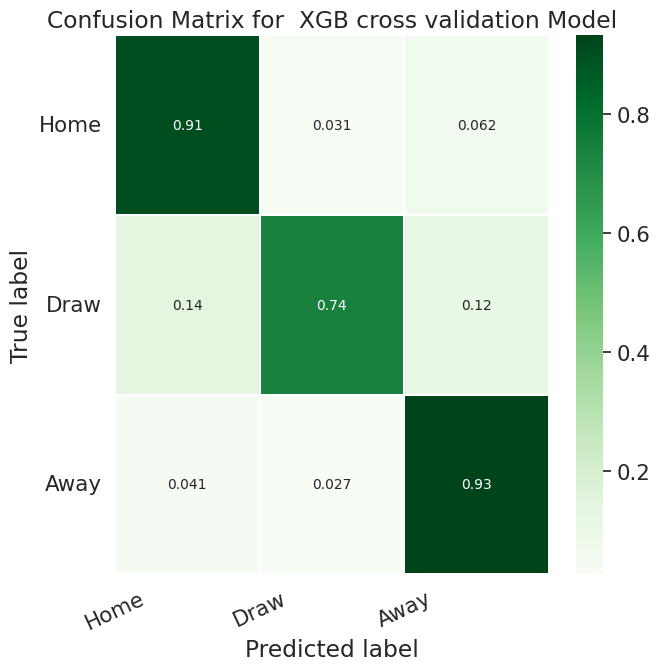

In [117]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test_bal, xgb_pred_bal)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(7,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Home','Draw','Away']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for  XGB cross validation Model')
plt.show()

## Held-out test set (world cup games)

In [118]:
def preprocess_test_data(data,full_data,ranking):
    """This function is used to preprocess the held-out test data"""
    """data['day'] = data['date'].dt.day
    data['month'] = data['date'].dt.month
    data['year'] = data['date'].dt.year
    data['dayoftheweek'] = data['date'].dt.dayofweek
    data['continent'] = data['country'].apply(get_continent)"""
    data['head_to_head_score'] = data[['home_team','away_team']].apply(lambda x: calculate_head_to_head_score(full_data,x['home_team'],x['away_team']),axis=1)
    data['rank_difference'] = data[['date','home_team','away_team']].apply(lambda x: calculate_rank_difference(ranking,x['date'],x['home_team'],x['away_team']),axis=1)
   
    data['rank_difference'] = data['rank_difference'].astype(float)
      # Add country achievements
    data.apply(lambda x: add_achievements(data,x['home_team'],x['away_team']),axis=1) 
    #data = check_and_reduce_skewness(data)
    data = data.drop(columns=['home_team','away_team','city','neutral','date','country','home_score','away_score','date'])

    test_data = pd.get_dummies(data)
    #test_data['neutral'] = test_data['neutral'].astype(int)
    
    return test_data

In [119]:
# Preprocess the held-out test data
test_data = preprocess_test_data(world_cup_games,historical_data,fifa_ranking)

# Identify the missing features related to the different cities with the training data 
missing_features = pd.DataFrame(np.zeros((test_data.shape[0],len((set(X_train.columns).difference(test_data.columns))))),columns=(list(set(X_train.columns).difference(test_data.columns))))
# Add the missing features to the held-out test data to do the predictions
test_features = pd.concat([test_data.reset_index(drop=True), missing_features],axis=1)


/home/amine/anaconda3/envs/udacity/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/amine/anaconda3/envs/udacity/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":
/home/amine/anaconda3/envs/udacity/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [120]:
# Make predictions for the world cup games using the imbalanced data models


test_features_sc = scaler.transform(test_features)

test_features['final_results_xgb'] = xgb_model.predict(test_features_sc)
test_features['final_results_rf'] = rf_model.predict(test_features_sc)
test_features['final_results_xgb_cv'] = xgb_model_cv.predict(test_features_sc)
test_features['final_results_rf_cv'] = random_forest_clf_cv.predict(test_features_sc)




/home/amine/anaconda3/envs/udacity/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [125]:
world_cup_games = world_cup_games.reset_index(drop=True)

In [127]:
# Remaining group stage games
remaining_games = world_cup_games.iloc[world_cup_games[world_cup_games['date']>'2022-11-27'].index]
remaining_games_indexes = remaining_games.index

In [128]:
test_features['home_team'] = world_cup_games['home_team']
test_features['away_team'] = world_cup_games['away_team']

In [129]:
# Show predictions using imbalanced models
test_features[['home_team','away_team','final_results_xgb','final_results_xgb_cv','final_results_rf','final_results_rf_cv']]

,home_team,away_team,final_results_xgb,final_results_xgb_cv,final_results_rf,final_results_rf_cv
0,Qatar,Ecuador,0,0,0,0
1,Senegal,Netherlands,0,0,0,0
2,England,Iran,2,2,2,2
3,United States,Wales,2,2,2,2
4,Argentina,Saudi Arabia,2,2,2,2
5,Mexico,Poland,2,2,2,2
6,Denmark,Tunisia,2,2,2,2
7,France,Australia,2,2,2,2
8,Germany,Japan,2,2,2,2
9,Spain,Costa Rica,2,2,2,2


In [130]:
# Show the remaining games predictions using imbalanced data models
test_features[['home_team','away_team','final_results_xgb','final_results_xgb_cv','final_results_rf','final_results_rf_cv']].iloc[remaining_games_indexes]

,home_team,away_team,final_results_xgb,final_results_xgb_cv,final_results_rf,final_results_rf_cv
28,Cameroon,Serbia,0,0,0,0
29,Brazil,Switzerland,2,2,2,2
30,South Korea,Ghana,2,2,2,2
31,Portugal,Uruguay,2,2,2,2
32,Ecuador,Senegal,0,0,0,0
33,Qatar,Netherlands,0,0,0,0
34,Wales,England,0,0,0,0
35,Iran,United States,0,0,0,0
36,Poland,Argentina,0,0,0,0
37,Saudi Arabia,Mexico,0,0,0,0


In [131]:
# Do the predictions using the balanced data models 
test_features['final_results_xgb_bal'] = xgb_model_bal.predict(test_features_sc)
test_features['final_results_rf_bal'] = rf_model_bal.predict(test_features_sc)
test_features['final_results_xgb_bal_cv'] = xgb_model_bal_cv.predict(test_features_sc)
test_features['final_results_rf_bal_cv'] = random_forest_clf_bal_cv.predict(test_features_sc)

/home/amine/anaconda3/envs/udacity/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [132]:
# Show predictions using balanced models

test_features[['home_team','away_team','final_results_xgb_bal','final_results_xgb_bal_cv','final_results_rf_bal','final_results_rf_bal_cv']].iloc[remaining_games_indexes]

,home_team,away_team,final_results_xgb_bal,final_results_xgb_bal_cv,final_results_rf_bal,final_results_rf_bal_cv
28,Cameroon,Serbia,0,0,0,0
29,Brazil,Switzerland,2,2,2,2
30,South Korea,Ghana,2,2,2,2
31,Portugal,Uruguay,2,2,2,2
32,Ecuador,Senegal,0,0,0,0
33,Qatar,Netherlands,0,0,0,0
34,Wales,England,1,0,1,0
35,Iran,United States,0,0,0,0
36,Poland,Argentina,0,0,0,0
37,Saudi Arabia,Mexico,0,0,0,0


In [133]:
# Show all the deployed results on the world cup games
deployed_results = test_features[['home_team','away_team','final_results_xgb','final_results_xgb_cv','final_results_xgb_bal','final_results_xgb_bal_cv','final_results_rf','final_results_rf_cv','final_results_rf_bal','final_results_rf_bal_cv']]
deployed_results

,home_team,away_team,final_results_xgb,final_results_xgb_cv,final_results_xgb_bal,final_results_xgb_bal_cv,final_results_rf,final_results_rf_cv,final_results_rf_bal,final_results_rf_bal_cv
0,Qatar,Ecuador,0,0,1,0,0,0,0,0
1,Senegal,Netherlands,0,0,0,0,0,0,0,0
2,England,Iran,2,2,2,2,2,2,2,2
3,United States,Wales,2,2,2,2,2,2,2,2
4,Argentina,Saudi Arabia,2,2,2,2,2,2,2,2
5,Mexico,Poland,2,2,2,2,2,2,2,2
6,Denmark,Tunisia,2,2,2,2,2,2,2,2
7,France,Australia,2,2,2,2,2,2,2,2
8,Germany,Japan,2,2,2,2,2,2,2,2
9,Spain,Costa Rica,2,2,2,2,2,2,2,2


In [134]:
# Save the remaining group stage games predictions
remaining_games.to_csv('remaining_group_stage_games_world_cup_2022.csv')

In [135]:
import pickle
def save_model(model, model_filepath):
    """This function is used to save the trained model.

    Args:
        model: The trained classifier.
        model_filepath: The output path of the classifier.
    """

    model = model
    with open(model_filepath, "wb") as file:
        pickle.dump(model, file)


In [136]:
# Save the best model
save_model(xgb_model_bal,'best_model.pkl')

# Next steps (EXTRA)

### Include the group stage already played games in the training set  

In [ ]:
# Add the played games to the data
played_games = world_cup_games[(world_cup_games['date'].dt.day < 25) & (world_cup_games['date'].dt.month==11)]
played_games['home_score'] = np.array([0,0,6,1,1,0,0,4,1,7,0,1,1,2,0,3])
played_games['away_score'] = np.array([2,2,2,1,2,0,0,1,2,0,0,0,0,0,0,2])
# Merge the played games to historical data
historical_data = pd.concat([historical_data,played_games])


## Include Player stats 2022 dataset 

In [137]:
# View the player stats dataframe
players_stats.head()


,Unnamed: 0,Squad,Comp,Player,Pos,Age,MP,Starts_Playing_Time,Min_Playing_Time,Mins_Per_90_Playing_Time,...,PK,PKatt,CrdY,CrdR,Gls_Per_Minutes,Ast_Per_Minutes,G+A_Per_Minutes,G_minus_PK_Per_Minutes,G+A_minus_PK_Per_Minutes,MP_Playing_Time
0,0,2022 Ecuador,WCQ — CONMEBOL M,Pervis Estupiñán,"DF,MF",24.0,17.0,17,1513.0,16.8,...,0.0,0.0,2.0,0.0,0.12,0.06,0.18,0.12,0.18,NaN
1,1,2022 Ecuador,WCQ — CONMEBOL M,Carlos Gruezo,MF,26.0,16.0,16,1395.0,15.5,...,1.0,1.0,2.0,0.0,0.06,0.00,0.06,0.00,0.00,NaN
2,2,2022 Ecuador,WCQ — CONMEBOL M,Moisés Caicedo,MF,20.0,15.0,15,1305.0,14.5,...,0.0,0.0,5.0,0.0,0.14,0.28,0.41,0.14,0.41,NaN
3,3,2022 Ecuador,WCQ — CONMEBOL M,Ángel Mena,"MF,FW",34.0,15.0,13,1079.0,12.0,...,0.0,0.0,2.0,0.0,0.17,0.25,0.42,0.17,0.42,NaN
4,4,2022 Ecuador,WCQ — CONMEBOL M,Michael Estrada,FW,25.0,17.0,11,1043.0,11.6,...,0.0,0.0,2.0,0.0,0.52,0.17,0.69,0.52,0.69,NaN


In [138]:
# Player stats data types 
players_stats.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1329 entries, 0 to 1328
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1329 non-null   int64  
 1   Squad                     1329 non-null   object 
 2   Comp                      1329 non-null   object 
 3   Player                    1329 non-null   object 
 4   Pos                       1329 non-null   object 
 5   Age                       1326 non-null   float64
 6   MP                        1232 non-null   float64
 7   Starts_Playing_Time       1329 non-null   int64  
 8   Min_Playing_Time          1076 non-null   float64
 9   Mins_Per_90_Playing_Time  1076 non-null   float64
 10  Gls                       1076 non-null   float64
 11  Ast                       1076 non-null   float64
 12  G_minus_PK                1076 non-null   float64
 13  PK                        1076 non-null   float64
 14  PKatt   

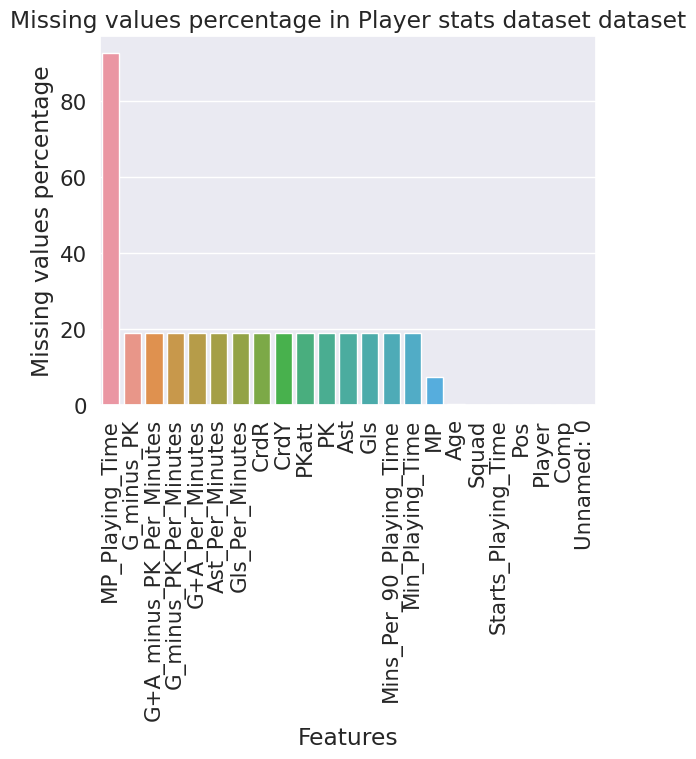

In [139]:
# Plot the missing values of player stats dataframe
player_stats_missing_vals = plot_missing_vals_percentage(players_stats,'Player stats dataset')


In [140]:
# Drop columns almost full of missing values
players_stats = players_stats.drop(columns=(player_stats_missing_vals[player_stats_missing_vals['missing_values_percentage'] > 60].index))
# Delete unnecessary columns
players_stats.drop(columns=['Unnamed: 0'],inplace=True)
# See the number of players per country
players_stats.Squad.value_counts()


2022 Ecuador           59
2022 Japan             57
2022 Saudi Arabia      55
2022 IR Iran           54
2022 Brazil            53
2022 Uruguay           52
2022 Korea Republic    50
2022 Ghana             49
2022 Argentina         45
2022 Poland            45
2022 United States     43
2022 Qatar             42
2022 Denmark           42
2022 Belgium           41
2022 Spain             41
2022 Mexico            41
2022 Switzerland       40
2022 Portugal          39
2022 Netherlands       39
2022 Germany           38
2022 Canada            38
2022 Croatia           38
2022 Tunisia           36
2022 Cameroon          36
2022 England           36
2022 Morocco           36
2022 Wales             36
2022 France            36
2022 Serbia            33
2022 Senegal           33
2022 Australia         23
2022 Costa Rica        23
Name: Squad, dtype: int64

In [141]:
# Clean the country names
players_stats.Squad = players_stats.Squad.str.replace('2022','')
players_stats.Squad = players_stats.Squad.str.replace('UnitedStates','United States').str.replace('CostaRica','Costa Rica').str.replace('IR Iran','Iran').str.replace('KoreaRepublic','South Korea')
players_stats.Squad.value_counts()


 Ecuador           59
 Japan             57
 Saudi Arabia      55
 Iran              54
 Brazil            53
 Uruguay           52
 Korea Republic    50
 Ghana             49
 Argentina         45
 Poland            45
 United States     43
 Qatar             42
 Denmark           42
 Belgium           41
 Spain             41
 Mexico            41
 Switzerland       40
 Portugal          39
 Netherlands       39
 Germany           38
 Canada            38
 Croatia           38
 Tunisia           36
 Cameroon          36
 England           36
 Morocco           36
 Wales             36
 France            36
 Serbia            33
 Senegal           33
 Australia         23
 Costa Rica        23
Name: Squad, dtype: int64

In [142]:
# Drop players with missing stats
players_stats = players_stats.dropna()


Text(0.5, 1.0, 'Number of player stats per country')

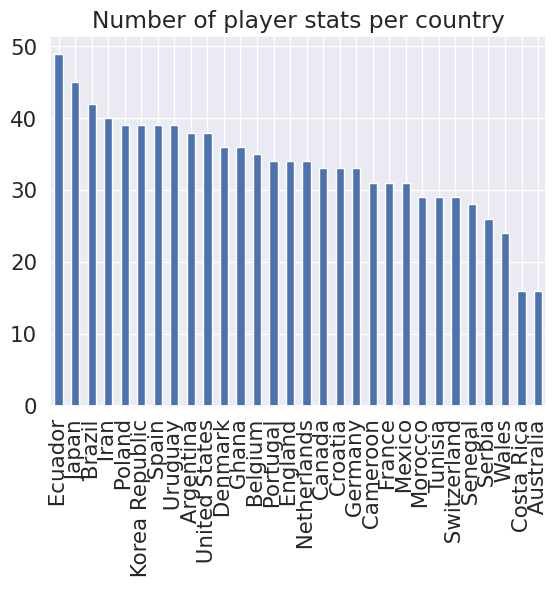

In [143]:
# Plot number of players per country
players_stats['Squad'].value_counts().plot(kind='bar')
plt.title('Number of player stats per country')


In [144]:
# View some descriptive statistics about the player stats dataframe
players_stats.describe()


,Age,MP,Starts_Playing_Time,Min_Playing_Time,Mins_Per_90_Playing_Time,Gls,Ast,G_minus_PK,PK,PKatt,CrdY,CrdR,Gls_Per_Minutes,Ast_Per_Minutes,G+A_Per_Minutes,G_minus_PK_Per_Minutes,G+A_minus_PK_Per_Minutes
count,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000
mean,26.587475,5.055666,3.641153,328.285288,3.647614,0.718688,0.494036,0.647117,0.071571,0.084493,0.505964,0.013917,0.204920,0.161451,0.366402,0.192644,0.354195
std,3.997238,3.767217,3.654678,308.528420,3.429029,1.545782,1.010130,1.345613,0.389983,0.441411,0.865861,0.117203,0.523865,0.501828,0.758670,0.508420,0.747574
min,17.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,2.000000,1.000000,90.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,4.000000,2.000000,235.500000,2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29.000000,7.000000,6.000000,502.000000,5.600000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.200000,0.140000,0.497500,0.177500,0.460000
max,38.000000,19.000000,17.000000,1522.000000,16.900000,13.000000,8.000000,12.000000,5.000000,6.000000,6.000000,1.000000,6.430000,9.000000,9.000000,6.430000,9.000000


In [145]:
# Mean player stats per country 
mean_stats = players_stats.groupby('Squad').mean()

In [146]:
def add_team_stats(data,home_team,away_team,world_cup_teams):
    """This function adds home and away teams mean stats."""
    if (home_team in world_cup_teams) | (away_team in world_cup_teams):
         
        for col in data:
            
            data['home_team_mean' + col] = data.loc[home_team][col]
            data['away_team_mean' + col] = data.loc[home_team][col]